In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import multilabel_confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from acquire import get_titanic_data
from prepare_notebook import prep_titanic

df=prep_titanic(get_titanic_data())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passenger_id    891 non-null int64
survived        891 non-null int64
pclass          891 non-null int64
sex             891 non-null object
age             714 non-null float64
sibsp           891 non-null int64
parch           891 non-null int64
fare            891 non-null float64
embarked        891 non-null int64
class           891 non-null object
embark_town     891 non-null object
alone           891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [2]:
df.dropna(inplace=True)
X=df[['pclass','age','fare','sibsp','parch']]
y=df.survived

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=123)

In [3]:
rf=RandomForestClassifier(bootstrap=True,
                         class_weight=None,
                         criterion='gini',
                         min_samples_leaf=3,
                         n_estimators=100_000,
                         max_depth=3,
                         random_state=123)

In [7]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100000, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [8]:
print(rf.feature_importances_)

[0.32565949 0.13441512 0.38502476 0.07312976 0.08177086]


In [9]:
y_pred=rf.predict(X_train)
y_pred_proba=rf.predict_proba(X_train)
#y_pred_proba

In [10]:
print('Accuracy of random forest classifier on training set: {:.2f}'.format(rf.score(X_train,y_train)))

Accuracy of random forest classifier on training set: 0.76


In [11]:
print(confusion_matrix(y_train,y_pred))

[[249  44]
 [ 78 128]]


In [12]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       293
           1       0.74      0.62      0.68       206

   micro avg       0.76      0.76      0.76       499
   macro avg       0.75      0.74      0.74       499
weighted avg       0.75      0.76      0.75       499



In [13]:
class_report=pd.DataFrame(classification_report(y_train,y_pred,output_dict=True)).reset_index().melt(id_vars='index',value_vars=['0','1'])
class_report.head()

,index,variable,value
0,f1-score,0,0.803226
1,precision,0,0.761468
2,recall,0,0.849829
3,support,0,293.000000
4,f1-score,1,0.677249


In [14]:
class_report['metric']=class_report['index']

In [15]:
class_report.drop(columns='index').set_index('variable')

,value,metric
variable,,
0,0.803226,f1-score
0,0.761468,precision
0,0.849829,recall
0,293.000000,support
1,0.677249,f1-score
1,0.744186,precision
1,0.621359,recall
1,206.000000,support


Let's check out our last classifier algorithm-K Nearest Neighbor

In [16]:
knn=KNeighborsClassifier(n_neighbors=5,weights='uniform')

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
y_pred=knn.predict(X_train)
y_pred_proba=knn.predict_proba(X_train)

In [19]:
print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train,y_train)))

Accuracy of KNN classifier on training set: 0.80


In [30]:
print(confusion_matrix(y_train,y_pred))

[[239  54]
 [ 65 141]]


In [31]:
labels=['croaked','survived']
pd.DataFrame(confusion_matrix(y_train,y_pred),index=labels,columns=labels)

,croaked,survived
croaked,239,54
survived,65,141


In [20]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       293
           1       0.76      0.76      0.76       206

   micro avg       0.80      0.80      0.80       499
   macro avg       0.79      0.79      0.79       499
weighted avg       0.80      0.80      0.80       499



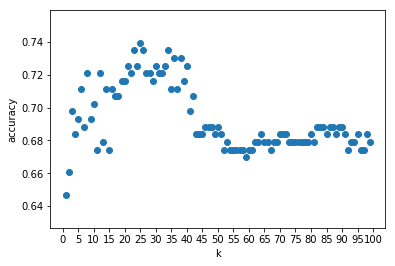

In [21]:
k_range=range(1,100)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])   
plt.show()